<a href="https://colab.research.google.com/github/samp3209/leetcodeanswers/blob/main/LeetCodeSandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For annoying stuff in python that I have to constantly look up

# Pandas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Sample data with issues
data = {
    'age': [25, 30, np.nan, 45, 200, 35],
    'income': [50000, 70000, 65000, np.nan, 85000, 55000],
    'education': ['high school', 'bachelor', 'master', 'phd', 'bachelor', np.nan],
    'category': ['A', 'B', 'A', 'C', 'B', 'A']
}

df = pd.DataFrame(data)
le_e = LabelEncoder()
le_c = LabelEncoder()

# Display the original DataFrame
print("Original DataFrame:")
print(df)
df['income'] = df['income'].fillna(df['income'].mean())
df['age'] = df['age'].fillna(df['age'].mean())
df['education'] = df['education'].fillna(df['education'].mode()[0])

print('Cleaned DF')
print(df)

df['education'] = le_e.fit_transform(df['education'])
df['category'] = le_c.fit_transform(df['category'])
print('Encoded DF')
print(df)

df['education'] = le_e.inverse_transform(df['education'])
df['category'] = le_c.inverse_transform(df['category'])
print('Decoded DF')
print(df)

Original DataFrame:
     age   income    education category
0   25.0  50000.0  high school        A
1   30.0  70000.0     bachelor        B
2    NaN  65000.0       master        A
3   45.0      NaN          phd        C
4  200.0  85000.0     bachelor        B
5   35.0  55000.0          NaN        A
Cleaned DF
     age   income    education category
0   25.0  50000.0  high school        A
1   30.0  70000.0     bachelor        B
2   67.0  65000.0       master        A
3   45.0  65000.0          phd        C
4  200.0  85000.0     bachelor        B
5   35.0  55000.0     bachelor        A
Encoded DF
     age   income  education  category
0   25.0  50000.0          1         0
1   30.0  70000.0          0         1
2   67.0  65000.0          2         0
3   45.0  65000.0          3         2
4  200.0  85000.0          0         1
5   35.0  55000.0          0         0
Decoded DF
     age   income    education category
0   25.0  50000.0  high school        A
1   30.0  70000.0     bachelor    

# New Section

Metrics:
accuracy: 0.8300
precision: 0.8667
recall: 0.8198
f1_score: 0.8426
confusion_matrix:
[[75 14]
 [20 91]]


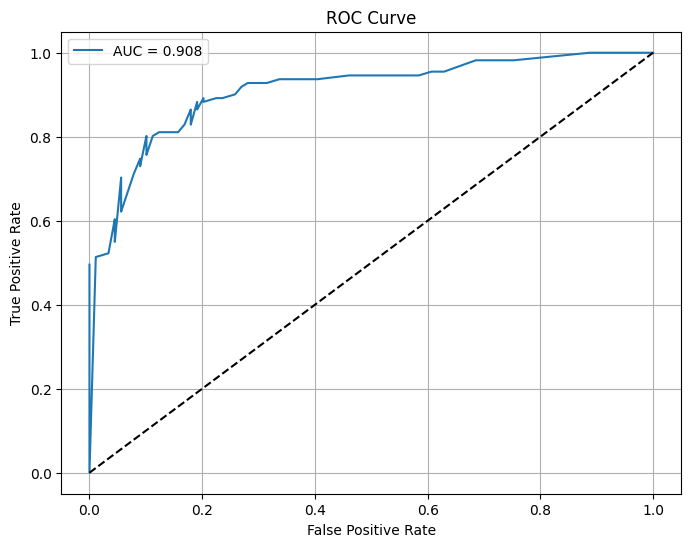

AUC: 0.9083
Cross-validation scores: [0.865, 0.855, 0.885, 0.855, 0.84]
Mean CV score: 0.8600
Standard deviation: 0.0148


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Task 1: Calculate metrics manually
def calculate_metrics(y_true, y_pred):
    """Calculate accuracy, precision, recall, F1 score manually."""
    # True Positives, True Negatives, False Positives, False Negatives
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': [[tn, fp], [fn, tp]]
    }

def plot_roc_curve(y_true, y_prob):
    """Plot ROC curve and calculate AUC."""
    # Calculate ROC curve
    thresholds = np.linspace(0, 1, 100)
    tpr = []  # True Positive Rate
    fpr = []  # False Positive Rate

    for threshold in thresholds:
        y_pred_threshold = (y_prob >= threshold).astype(int)

        tp = np.sum((y_true == 1) & (y_pred_threshold == 1))
        fn = np.sum((y_true == 1) & (y_pred_threshold == 0))
        fp = np.sum((y_true == 0) & (y_pred_threshold == 1))
        tn = np.sum((y_true == 0) & (y_pred_threshold == 0))

        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

    # Sort points by FPR (needed for AUC calculation)
    points = sorted(zip(fpr, tpr), key=lambda x: x[0])
    fpr_sorted, tpr_sorted = zip(*points)

    # Calculate AUC using trapezoidal rule
    auc = 0
    for i in range(len(fpr_sorted) - 1):
        # Width × average height
        width = fpr_sorted[i+1] - fpr_sorted[i]
        height = (tpr_sorted[i] + tpr_sorted[i+1]) / 2
        auc += width * height

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_sorted, tpr_sorted, label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    return auc

# Task 3: Implement k-fold cross-validation
def k_fold_cross_validation(X, y, model, k=5):
    """Implement k-fold cross-validation from scratch."""
    # Shuffle the data
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Create k folds
    fold_size = len(X) // k
    scores = []

    for i in range(k):
        # Create validation fold
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else len(X)

        X_val = X_shuffled[start:end]
        y_val = y_shuffled[start:end]

        # Create training folds
        X_train = np.concatenate([X_shuffled[:start], X_shuffled[end:]])
        y_train = np.concatenate([y_shuffled[:start], y_shuffled[end:]])

        # Train model
        model.fit(X_train, y_train)

        # Evaluate model
        score = model.score(X_val, y_val)
        scores.append(score)

    return scores, np.mean(scores), np.std(scores)

# Execute the tasks
metrics = calculate_metrics(y_test, y_pred)
print("Metrics:")
for metric, value in metrics.items():
    if metric != 'confusion_matrix':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}:")
        print(np.array(value))

auc = plot_roc_curve(y_test, y_prob)
print(f"AUC: {auc:.4f}")

cv_scores, mean_cv, std_cv = k_fold_cross_validation(X, y, LogisticRegression(), k=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {mean_cv:.4f}")
print(f"Standard deviation: {std_cv:.4f}")

#**Math**

In [ ]:
#Division by default is division
3/2

1.5

In [ ]:
# Double slash rounds DOWN
3//2

1

In [ ]:
#Negatives will round down
-3//2

-2

In [ ]:
#Workaround to round up
int(-3/2)

-1

In [ ]:
#Modding is normal for positive
10%3

1

In [ ]:
#Negatives are a bit tricky
-10%3

2

In [ ]:
#Workaround for this is
import math
math.fmod(-10, 3)

-1.0

In [ ]:
#Some stuff with math function
print(math.floor(3/2))
print(math.ceil(3/2))

1
2


In [ ]:
#Max and min integers
float("inf")
float("-inf")

-inf

# Arrays

In [ ]:
#Arrays in python are dynamic and can be used as stacks
arr = [0,1,2,3]
arr.append(4)
print(arr)
arr.pop()
print(arr)

[0, 1, 2, 3, 4]
[0, 1, 2, 3]


In [ ]:
#we can insert at given indices
arr.insert(1, 8)
print(arr)

[0, 8, 1, 2, 3]


In [ ]:
a,b,c,d,e = arr #unpacks values from array
print(a)
print(b)
print(c)
print(d)
print(e)

0
8
1
2
3


In [ ]:
#Loop through arrays
#using index
for i in range(len(arr)):
  print(arr[i])
print("___________")
#without index
for x in arr:
  print(x)
print("___________")
#with index and value
for i,x in enumerate(arr):
  print(i,x)

0
8
1
2
3
___________
0
8
1
2
3
___________
0 0
1 8
2 1
3 2
4 3


In [ ]:
#Loop through multiple arrays using unpacking
arr2 = [5,6,7,8,9]
for x,y in zip(arr, arr2):
  print(x,y)

0 5
8 6
1 7
2 8
3 9


In [ ]:
#Reverse an array
arr.reverse()
print(arr)

[3, 2, 1, 8, 0]


In [ ]:
#Sorting an array
arr.sort(reverse=True)
print(arr)

[8, 3, 2, 1, 0]


In [ ]:
#Sorting text arrays
texts = ['bob', 'alice', 'charlie']
texts.sort()
print(texts)

['alice', 'bob', 'charlie']


In [ ]:
#Sorting by custom value
texts.sort(key=len, reverse=True)
print(texts)

['charlie', 'alice', 'bob']


In [ ]:
#List Comprehensions
arr = [x for x in range(4)]
print(arr)
arr = [x+x for x in range(4)]
print(arr)

[0, 1, 2, 3]
[0, 2, 4, 6]


In [ ]:
#List comprehension with 2d array
arr = [[0] * 4 for i in range(4)]
print(arr)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


*Tackling* Array Problems **bold text**


In [ ]:
#Doing a manual check for duplicate
list = [0,2,4,3,5,6,7,7]
copy = []
for i in list:
  if i in copy:
    print("Duplicate found")
  else:
    copy.append(i)


In [ ]:
list = [0,2,4,3,5,6,7,7]
s = set()
for i in list:
  if i not in s:
    s.add(i)
  else:
    print("Duplicate found")

Duplicate found


Stacks


In [ ]:
# Valid parenthesis problem
def isValid(s):
  stack = []
  hmap = {')':'(', '}':'{', ']':'['} # assing hashmap to track the closing
  for c in s: # for character in string
    if c in hmap: # if character is in hashmap
      if stack and stack[-1] == hmap[c]: #if stack is not empty and stack contains corresponding open parenthesis
        stack.pop() #get rid of that open item
      else:
        return False #we can return false because we are looking at a close with no open
    else: #gets here if open
      stack.append(c) # add open to stack
    if len(stack)==0: # if stack is empty than all opens have been closed
      return True
  return False

print(isValid("()"))
print(isValid("()[]{}"))
print(isValid("(]"))
print(isValid("([)]"))
print(isValid("{[][]()}"))


True
True
False
False
False


# Strings


In [ ]:
#Strings are like arrays but immutable
s = 'abc'
print(s[0:2])
#s[0] = 'A' <- runs error
#print(s)

ab


In [ ]:
#Reverse a string
s[::-1]

'cba'

In [ ]:
#Lowercase
s.lower()
#Uppercase
s.upper()

In [ ]:
#modifying a string creates a new string in n time operation
s += 'def'
s

'abcdef'

In [ ]:
#Combining list of strings
list = ['ab','cd','ef']
"".join(list)

'abcdef'

In [ ]:
def passwordVerif(password):
  if len(password) < 8:
    return False
  if not any(char.isdigit() for char in password):
    return False
  if not any(char.isupper() for char in password):
    return False
  if not any(char.islower() for char in password):
    return False
  special = "!@#$%^&*()_+="
  if not any(char in special for char in password):
    return False

  return True

print(passwordVerif("Abcdefgh"))
print(passwordVerif("Abcdefgh1"))
print(passwordVerif("Abcdefgh1!"))
print(passwordVerif("Ab23$*"))

False
False
True
False


# Queues


In [ ]:
from collections import deque
queue = deque()
queue.append(1)
queue.append(2)
queue.append(3)
print(queue)
print(queue.popleft())
print(queue)
queue.appendleft(0)
print(queue)
queue.pop()
print(queue)

deque([1, 2, 3])
1
deque([2, 3])
deque([0, 2, 3])
deque([0, 2])


# Hash sets are constant time search

In [ ]:
myset = set()

myset.add(1)
myset.add(2)
myset.add(3)

print(1 in myset)
print(4 in myset)

myset.remove(2)
print(2 in myset)

True
False
False


In [ ]:
#Like lists we can add to it both explicity and with loop
print(set([1,2,3]))

myset = { i for i in range(5)}
print(myset)

{1, 2, 3}
{0, 1, 2, 3, 4}


#Hashmaps


In [ ]:
mymap = {} #no duplicate keys
mymap['a'] = 1
mymap['b'] = 2
mymap['c'] = 3
print(mymap)
print(mymap['b'])


{'a': 1, 'b': 2, 'c': 3}
2


In [ ]:
print(len(mymap)) #prints number of keys.
mymap['a'] = 42
print(mymap)

3
{'a': 42, 'b': 2, 'c': 3}


In [ ]:
mymap.pop('a')
print(mymap)

{'b': 2, 'c': 3}


In [ ]:
mymap = {'sam': 42, 'ben':21}
print(mymap)

{'sam': 42, 'ben': 21}


In [ ]:
#dict comprehension
mymap = {i: i*2 for i in range(3)}
print(mymap)

{0: 0, 1: 2, 2: 4}


In [ ]:
#looping through the dict based on key or value
for key in mymap:
  print(key, mymap[key])

for val in mymap.values():
  print(val)

for key, val in mymap.items():
  print(key, val)

0 0
1 2
2 4
0
2
4
0 0
1 2
2 4


In [ ]:
def isAnaGram(s, t):
  if len(s) != len(t):
    return False

  counts = 26*[0]
  for c in range(len(s)):
    counts[ord(s[c]) - ord('a')]+=1 #gets the ordinal value (unicode) for the current character, by subtracting we get the index location in the list
    counts[ord(t[c]) - ord('a')]-=1

  for val in counts:
    if val != 0:
      return False
  return True

s = "lemon"
t = "mellon"
print(isAnaGram(s,t))

In [2]:
def twosum(nums, target):
  vals = {} # value: index
  for i, num in enumerate(nums): #iterate both i and num
    if target - num in vals: # check the dictionary for value that adds with num to target
      return [vals[target-num], i] #return it
    vals[num] = i # add item to dictionary
  return None

nums = [2,7,11,15]
target = 9
print(twosum(nums, target))

[0, 1]


In [4]:
items = {}
target = 22
for index, number in enumerate(nums):
  if target / 2 in items:
    print([items[target/2], index])
  else:
    items[number] = index

[2, 3]


#Tuples are immutable arrays

In [ ]:
tup = (0,1,2)
print(tup[0])
print(tup[-1])

0
2


In [ ]:
# cant modify them
tup[0] = 2

TypeError: 'tuple' object does not support item assignment

In [ ]:
# can be used as keys for a hashset
mymap  = {(1,2): 3, (4,5): 6}
print(mymap[(1,2)])

3


# Linked List

In [ ]:
#Standard singly linked list class using value and next pointers
class ListNode:
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next

x = ListNode(1)
y = ListNode(2)
z = ListNode(3)
x.next = y
y.next = z
print(x.val)
print(y.val)
print(z.val)
print(x.next.val)
print(y.next.val)


1
2
3
2
3


In [ ]:
#reversing a singly linked list using current for the head node, previous as none
# we loop while current exists, set a temp variable to the next node
# current next node to previous node, update the previous to be the current and the current to be next node
curr = x
prev = None
while curr:
  temp = curr.next
  curr.next = prev
  prev = curr
  curr = temp

print(z.next.val)


2


# Binary Search Trees

Best way to iterate through trees using BFS and DFS

In [ ]:
def DFSinorder(root):
  """recursive inorder traversal for DFS"""
  if root:
    DFSinorder(root.left)
    print(root.val, end=' ')
    DFSinorder(root.right)
DFSinorder(x)

4 2 5 1 3 

In [ ]:
def DFSinorderiterative(root):
  stack = []
  curr = root
  while curr or stack:
    while curr:
      stack.append(curr)
      curr = curr.left #go as left as possible
    curr = stack.pop()
    print(curr.val, end=' ')
    curr = curr.right
DFSinorderiterative(x)

4 2 5 1 3 

In [ ]:
from collections import deque
def BFSlevelorder(root):
  """iterative level traversal for BFS"""
  if not root:
    return None
  q = deque([root])
  while q:
    node = q.popleft()
    print(node.val, end=' ')
    if node.left:
      q.append(node.left)
    if node.right:
      q.append(node.right)
BFSlevelorder(x)


1 2 3 4 5 

Pre and Post Order DFS

In [ ]:
def preorder(root):
  if root:
    print(root.val, end=' ')
    preorder(root.left)
    preorder(root.right)
preorder(x)

1 2 4 5 3 

In [ ]:
def iterativepreorder(root):
  if not root:
    return None
  stack = [root]
  while stack:
    node = stack.pop()
    print(node.val, end=' ')
    if node.right:
      stack.append(node.right)
    if node.left:
      stack.append(node.left)
iterativepreorder(x)

1 2 4 5 3 

In [ ]:
def postorder(root):
  if root:
    postorder(root.left)
    postorder(root.right)
    print(root.val, end=' ')
postorder(x)

4 5 2 3 1 

In [ ]:
def iterpostorder(root):
  if not root:
    return None
  stack1 = [root]
  stack2 = []
  while stack1:
    node = stack1.pop()
    stack2.append(node)
    if node.left:
      stack1.append(node.left)
    if node.right:
      stack1.append(node.right)
  while stack2:
    node = stack2.pop()
    print(node.val, end=' ')
iterpostorder(x)


4 5 2 3 1 

In [ ]:
# construction of a simple tree node. Building the tree is kind of difficult where we have to build leafs first
class TreeNode:
  def __init__(self, val, left=None, right=None):
    self.val = val
    self.left = left
    self.right = right

y = TreeNode(2, TreeNode(4), TreeNode(5))
z = TreeNode(3)
x = TreeNode(1, y, z)
print(x.val)
print(x.left.val)

print(x.left.left.val)

1
2
4


In [ ]:
# iterative DFS.
def sameTree(p, q):
  stack =[(p, q)] # we can store both nodes in the same stack because we want them to be same
  while stack:
    node1, node2 = stack.pop
    if not node1 and not node2:
      continue
    if not node1 or not node2 or node1.val != node2.val:
      return False
    stack.append((node1.left, node2.left))
    stack.append((node1.right, node2.right))
  return True

In [ ]:
from collections import deque
#breadth first solution to finding the maxDepth of a BST
def maxDepth(root):
  q = deque() #deque to pop from
  if root:
    q.append(root)

  level = 0
  while q:
    for i in range(len(q)):
      node = q.popleft()
      if node.left:
        q.append(node.left)
      if node.right:
        q.append(node.right)
    level+=1
  return level

print(maxDepth(x))

"""For breadth first search we want to use a deque to get the first in first out order of the nodes.
We want to look at each node in a row rather than in a downward line. We process each of the children nodes
pop the parent node and then once were done with that level we increment the level counter and go down
to the next set of children."""

3


In [ ]:
# max depth for a BST using depth first search
def maxDepth(root):
  stack = [[root, 1]]
  res = 0
  while stack:
    node, depth = stack.pop()
    if node:
      res = max(res, depth)
      stack.append([node.right, depth+1])
      stack.append([node.left, depth+1])
  return res

print(maxDepth(x))

"""For depth first search, we use a stack because we want the last in first out structure so we can check the
newest child node's children. We pop the most recently added node and check if it exists then we add both its
children to the stack after updating the res."""

3


In [ ]:
# max width of tree using depth first search
def widthOfBinaryTree(root):
  stack = [root]
  mp = {None: (0,0)}

  while stack:
    node = stack[-1]

    if node.left and node.left not in mp:
      stack.append(node.left)
    elif node.right and node.right not in mp:
      stack.append(node.right)
    else:
      stack.pop()

      leftH, leftD = mp[node.left]
      rightH, rightD = mp[node.right]

      mp[node] = (max(leftH, rightH)+1, max(leftH+rightH,leftD, rightD))
  return mp[root][1]

print(widthOfBinaryTree(x))


3


# Sorting Algorithms

In [ ]:
# Insertion sort O(n^2)
def insertionSort(arr):
  j=2
  for j in range(1, len(arr)):
    key = arr[j]
    i = j-1
    while i>=0 and arr[i]>key:
      arr[i+1] = arr[i]
      i=i-1
    arr[i+1] = key
  return arr

print(insertionSort([5,2,4,6,1,3]))


[1, 2, 3, 4, 5, 6]


In [ ]:
# Merge Sort O(nlgn)
import math
def merge(A, p, q, r):
    # Step 1: Calculate the sizes of the two subarrays
    n1 = q - p + 1
    n2 = r - q

    # Step 2: Create temporary arrays L and R
    L = [0] * (n1 + 1)  # Extra space for sentinel value
    R = [0] * (n2 + 1)  # Extra space for sentinel value

    # Step 3: Copy data into temporary arrays L and R
    for i in range(n1):
        L[i] = A[p + i]
    for j in range(n2):
        R[j] = A[q + j + 1]

    # Step 4: Add sentinel values at the end of L and R
    L[n1] = float('inf')  # Sentinel value (infinity)
    R[n2] = float('inf')  # Sentinel value (infinity)

    # Step 5: Merge the two arrays back into A[p..r]
    i = 0  # Index for L
    j = 0  # Index for R
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

def mergeSort(arr, p, r):
  if p<r:
    q = math.floor((p+r)/2)
    mergeSort(arr, p, q)
    mergeSort(arr, q+1, r)
    merge(arr, p, q, r)
  return arr

print(mergeSort([5,2,4,6,1,3], 0, 5))


[1, 2, 3, 4, 5, 6]


In [ ]:
# Quicksort best case / average case nlgn. Worst case n^2 if

def partion(arr, p, r):
  x = arr[r]
  i = p-1
  j = p
  while j < r:
    if arr[j] <= x:
      i+=1
      arr[i], arr[j] = arr[j], arr[i]
    j+=1
  arr[i+1], arr[r] = arr[r], arr[i+1]
  return i+1

def quicksort(arr, p, r):
  if p<r:
    q = partion(arr, p, r)
    quicksort(arr, p, q-1)
    quicksort(arr, q+1, r)
  return arr

print(quicksort([5,2,4,6,1,3], 0, 5))


[1, 2, 3, 4, 5, 6]


In [ ]:
# Max Heapify average/best/worst case O(nlgn)
def maxheapify(A, heap_size, i):
    l = 2 * i + 1  # Left child
    r = 2 * i + 2  # Right child
    largest = i    # Initialize largest as root

    # Check if left child exists and is greater than root
    if l < heap_size and A[l] > A[largest]:
        largest = l

    # Check if right child exists and is greater than the largest so far
    if r < heap_size and A[r] > A[largest]:
        largest = r

    # If the largest is not the root, swap and recursively heapify
    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        maxheapify(A, heap_size, largest)

def buildmaxheap(A):
    heap_size = len(A)
    # Start from the last non-leaf node and heapify all nodes
    for i in range(heap_size // 2 - 1, -1, -1):
        maxheapify(A, heap_size, i)
    return A

def heapsort(A):
    heap_size = len(A)
    # Build a max heap
    buildmaxheap(A)
    # Extract elements one by one
    for i in range(heap_size - 1, 0, -1):
        # Swap the root (max element) with the last element
        A[0], A[i] = A[i], A[0]
        # Reduce the heap size and heapify the root
        maxheapify(A, i, 0)
    return A

# Test the implementation
print(heapsort([5, 2, 4, 6, 1, 3]))


[1, 2, 3, 4, 5, 6]


In [ ]:
#Counting Sort Theta(n+k)
def counting_sort(A, k):
    # Step 1: Create a count array C of size k+1 and initialize it to 0
    C = [0] * (k + 1)

    # Step 2: Count the occurrences of each element in A
    for j in range(len(A)):
        C[A[j]] += 1

    # Step 3: Modify the count array to store the cumulative count
    for i in range(1, k + 1):
        C[i] += C[i - 1]

    # Step 4: Create the output array B of the same size as A
    B = [0] * len(A)

    # Step 5: Place the elements in their correct positions in B
    for j in range(len(A) - 1, -1, -1):
        B[C[A[j]] - 1] = A[j]
        C[A[j]] -= 1

    return B

A = [4, 2, 2, 8, 3, 3, 1]
k = 8  # Maximum value in A

sorted_A = counting_sort(A, k)
print(sorted_A)

[1, 2, 2, 3, 3, 4, 8]


In [ ]:
# radix sort needs counting sort or another linear time search to implement in Theta(d(n+k)) time

def counting_sort_for_radix(A, exp):
    """
    A subroutine to sort the array A based on a specific digit (exp).
    """
    n = len(A)
    B = [0] * n  # Output array
    C = [0] * 10  # Count array for digits 0-9

    # Count the occurrences of each digit
    for i in range(n):
        index = (A[i] // exp) % 10
        C[index] += 1

    # Modify the count array to store cumulative counts
    for i in range(1, 10):
        C[i] += C[i - 1]

    # Build the output array B
    i = n - 1
    while i >= 0:
        index = (A[i] // exp) % 10
        B[C[index] - 1] = A[i]
        C[index] -= 1
        i -= 1

    # Copy the sorted elements back into A
    for i in range(n):
        A[i] = B[i]

def radix_sort(A):
    """
    Main function to perform Radix Sort.
    """
    # Find the maximum number to determine the number of digits
    max_num = max(A)

    # Perform counting sort for every digit
    exp = 1
    while max_num // exp > 0:
        counting_sort_for_radix(A, exp)
        exp *= 10  # Move to the next digit

    return A

In [ ]:
# Achieves linear time if uniform-ish distribution
def bucket_sort(A):
    """
    Bucket Sort algorithm.
    """
    n = len(A)
    # Step 1: Create an array of empty buckets
    B = [[] for _ in range(n)]

    # Step 2: Insert elements into buckets
    for num in A:
        bucket_index = int(n * num)  # Calculate the bucket index
        B[bucket_index].append(num)

    # Step 3: Sort each bucket using insertion sort
    for i in range(n):
        insertionSort(B[i])

    # Step 4: Concatenate all buckets into a single sorted array
    sorted_A = []
    for bucket in B:
        sorted_A.extend(bucket)

    return sorted_A

A = [0.42, 0.32, 0.33, 0.52, 0.37, 0.47, 0.51]
sorted_A = bucket_sort(A)
print(sorted_A)

[0.32, 0.33, 0.37, 0.42, 0.47, 0.51, 0.52]
